In [113]:
# Import Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import requests
import gmaps
import os
import json

# Import API key
from config import g_key


In [114]:
# Import data file
divvy_df = pd.read_csv('resources/Divvy_Trips_2019_Q3.csv')


In [115]:
# Remove null rows (if needed)
divvy_df.dropna()
divvy_df.shape

(1640718, 12)

In [116]:
divvy_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN


In [117]:
divvy_df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [118]:
top_routes = divvy_df['from_station_name'].value_counts()
total_trips_df = pd.DataFrame({
    'total trips': top_routes
})

total_trips_reduced = total_trips_df.loc[total_trips_df['total trips'] >= 10000]
total_trips_reduced

,total trips
Streeter Dr & Grand Ave,39726
Lake Shore Dr & Monroe St,26309
Lake Shore Dr & North Blvd,21845
Michigan Ave & Oak St,20300
Canal St & Adams St,20176
Clinton St & Madison St,19019
Theater on the Lake,18491
Millennium Park,18337
Clinton St & Washington Blvd,16854
Michigan Ave & Washington St,16073


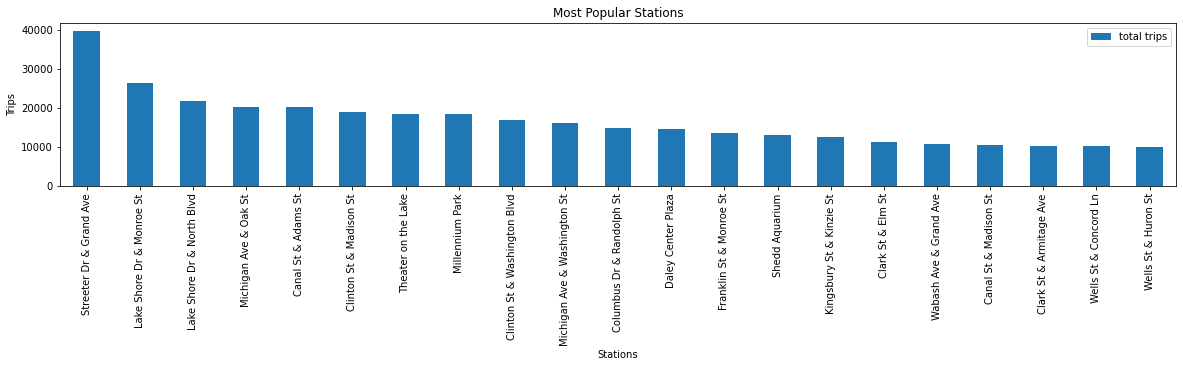

<Figure size 432x288 with 0 Axes>

In [119]:
total_trips_reduced.plot(kind='bar', figsize=(20,3))
plt.title('Most Popular Stations')
plt.xlabel('Stations')
plt.ylabel('Trips')
plt.show()
plt.tight_layout()





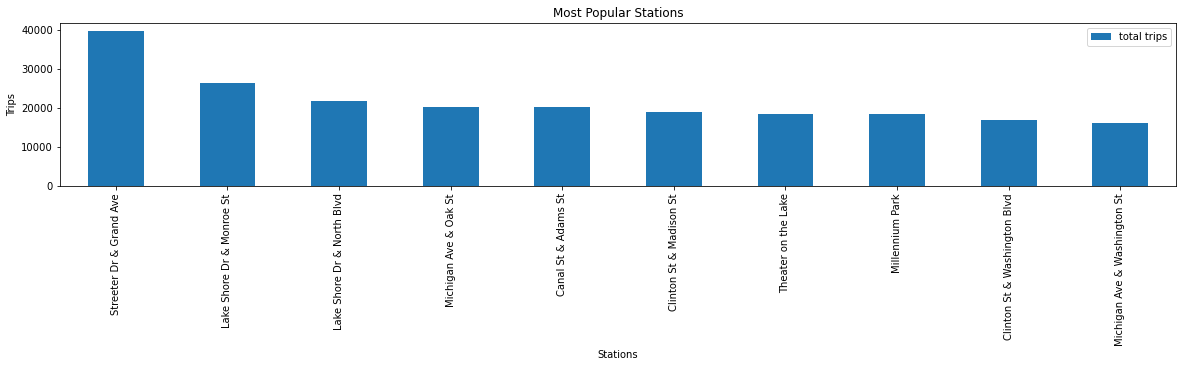

In [120]:
total_trips_reduced_to_ten = total_trips_reduced.iloc[0:10, :]
total_trips_reduced_to_ten.plot(kind='bar', figsize=(20,3))
plt.title('Most Popular Stations')
plt.xlabel('Stations')
plt.ylabel('Trips')
plt.show()


In [121]:
divvy_rides = {'from_station': divvy_df['from_station_name'],
               'to_station': divvy_df['to_station_name']
              }

divvy_rides_df = pd.DataFrame(divvy_rides, columns=['from_station', 'to_station'])
dup_to_from = divvy_rides_df.pivot_table(index=['from_station', 'to_station'], aggfunc='size')

In [122]:
dup_to_from.columns = dup_to_from.droplevel(0)
dup_to_from.columns.name = None
dup_to_from_II = dup_to_from.reset_index()


In [123]:
to_from_III = dup_to_from_II.rename(columns={'from_station': 'from_station', 'to_station':'to_station', 0:'rides_taken'})
to_from_III

,from_station,to_station,rides_taken
0,2112 W Peterson Ave,2112 W Peterson Ave,6
1,2112 W Peterson Ave,Broadway & Argyle St,2
2,2112 W Peterson Ave,Broadway & Barry Ave,2
3,2112 W Peterson Ave,Broadway & Berwyn Ave,3
4,2112 W Peterson Ave,Broadway & Granville Ave,6
...,...,...,...
101526,Yates Blvd & 75th St,South Shore Dr & 71st St,4
101527,Yates Blvd & 75th St,South Shore Dr & 74th St,3
101528,Yates Blvd & 75th St,Stony Island Ave & 82nd St,1
101529,Yates Blvd & 75th St,Woodlawn Ave & Lake Park Ave,1


In [124]:
to_from_removed_dups = to_from_III[to_from_III['from_station'] != to_from_III['to_station']]


# 25 Most Popular Divvy Routes

In [125]:
most_pop_rides = to_from_removed_dups.loc[to_from_removed_dups.groupby('from_station')['rides_taken'].idxmax()]
most_popular_routes = most_pop_rides.sort_values(ascending=False, by='rides_taken').reset_index(drop=True)
most_popular_reduced = most_popular_routes[0:10]
most_popular_reduced

,from_station,to_station,rides_taken
0,Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,5055
1,Streeter Dr & Grand Ave,Lake Shore Dr & North Blvd,2132
2,Shedd Aquarium,Streeter Dr & Grand Ave,1813
3,Millennium Park,Streeter Dr & Grand Ave,1775
4,Lake Shore Dr & North Blvd,Streeter Dr & Grand Ave,1703
5,Theater on the Lake,Streeter Dr & Grand Ave,1559
6,Dusable Harbor,Streeter Dr & Grand Ave,1414
7,Canal St & Adams St,Michigan Ave & Washington St,1355
8,Michigan Ave & Oak St,Streeter Dr & Grand Ave,1334
9,Michigan Ave & Washington St,Clinton St & Washington Blvd,1056


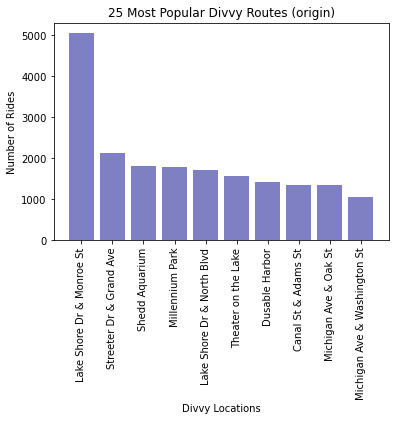

<Figure size 432x288 with 0 Axes>

In [126]:
plt.bar(most_popular_reduced['from_station'], most_popular_reduced['rides_taken'], color='darkblue', alpha=.5, align='center')
plt.xticks(most_popular_reduced['from_station'], rotation='vertical')
plt.title('25 Most Popular Divvy Routes (origin)')
plt.xlabel('Divvy Locations')
plt.ylabel('Number of Rides')
plt.show()
plt.tight_layout()

In [127]:
mpr = most_popular_reduced.copy()

In [195]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

mask = mpr['from_station'].str.startswith('L')

mpr.loc[mask, 'to_station'] = 'Streeter Dr & Grand Ave'

mpr


,from_station,to_station,rides_taken,Place ID,latitude,longitude
0,Lake+Shore+Dr+and+Monroe+St,Streeter Dr & Grand Ave,5055,ChIJXS-zu40sDogRCRFLBMBdmF8,41.87869,-87.640311
1,Streeter+Dr+and+Grand+Ave,Lake Shore Dr & North Blvd,2132,ChIJXS-zu40sDogRCRFLBMBdmF8,41.87869,-87.640311
2,Shedd+Aquarium,Streeter Dr & Grand Ave,1813,ChIJXS-zu40sDogRCRFLBMBdmF8,41.87869,-87.640311
3,Millennium+Park,Streeter Dr & Grand Ave,1775,ChIJXS-zu40sDogRCRFLBMBdmF8,41.87869,-87.640311
4,Lake+Shore+Dr+and+North+Blvd,Streeter Dr & Grand Ave,1703,ChIJXS-zu40sDogRCRFLBMBdmF8,41.87869,-87.640311
5,Theater+on+the+Lake,Streeter Dr & Grand Ave,1559,ChIJXS-zu40sDogRCRFLBMBdmF8,41.87869,-87.640311
6,Dusable+Harbor,Streeter Dr & Grand Ave,1414,ChIJXS-zu40sDogRCRFLBMBdmF8,41.87869,-87.640311
7,Canal+St+and+Adams+St,Michigan Ave & Washington St,1355,ChIJXS-zu40sDogRCRFLBMBdmF8,41.87869,-87.640311
8,Michigan+Ave+and+Oak+St,Streeter Dr & Grand Ave,1334,ChIJXS-zu40sDogRCRFLBMBdmF8,41.87869,-87.640311
9,Michigan+Ave+and+Washington+St,Clinton St & Washington Blvd,1056,ChIJXS-zu40sDogRCRFLBMBdmF8,41.87869,-87.640311


In [231]:
mpr_I = mpr["from_station"] = mpr["from_station"].str.replace(' ', '+')
mpr_I
mpr_I = mpr["from_station"] = mpr["from_station"].str.replace('&', 'and')
mpr_I = mpr["from_station"] = mpr["from_station"].str.lstrip()

mpr_I

0       Lake+Shore+Dr+and+Monroe+St
1         Streeter+Dr+and+Grand+Ave
2                    Shedd+Aquarium
3                   Millennium+Park
4      Lake+Shore+Dr+and+North+Blvd
5               Theater+on+the+Lake
6                    Dusable+Harbor
7             Canal+St+and+Adams+St
8           Michigan+Ave+and+Oak+St
9    Michigan+Ave+and+Washington+St
Name: from_station, dtype: object

In [226]:
# stations = mpr_I["from_station"]

         

url = "https://maps.googleapis.com/maps/api/geocode/json?"
address = 'address=' + 'Streeter+Dr+and+Grand+Ave'
api_key = '&key=' + g_key
city_state = ',+Chicago,+IL"'

# place_id = []
# latitude = []
# longitude = []

# for station in stations:
response = requests.get(url +  address + city_state + api_key).json()
print(json.dumps(response, indent=4, sort_keys=True))
place_id.append(response['results'][0]["place_id"])
latitude.append(response['results'][0]['geometry']['location']['lat'])
longitude.append(response['results'][0]['geometry']['location']['lng'])
  
        



{
    "results": [
        {
            "address_components": [
                {
                    "long_name": "East Grand Avenue & North Streeter Drive",
                    "short_name": "E Grand Ave & N Streeter Dr",
                    "types": [
                        "intersection"
                    ]
                },
                {
                    "long_name": "Streeterville",
                    "short_name": "Streeterville",
                    "types": [
                        "neighborhood",
                        "political"
                    ]
                },
                {
                    "long_name": "Chicago",
                    "short_name": "Chicago",
                    "types": [
                        "locality",
                        "political"
                    ]
                },
                {
                    "long_name": "Cook County",
                    "short_name": "Cook County",
                    "types": [


In [241]:
# stations = mpr_I["from_station"]
     

place_id = []
latitude = []
longitude = []

for station in mpr_I:
    url = "https://maps.googleapis.com/maps/api/geocode/json?"
    address = 'address=' + station
    api_key = '&key=' + g_key
    city_state = ',+Chicago,+IL"'
    
    
    response = requests.get(url +  address + city_state + api_key).json()
    print(json.dumps(response, indent=4, sort_keys=True))
    
    place_id.append(response['results'][0]["place_id"])
    latitude.append(response['results'][0]['geometry']['location']['lat'])
    longitude.append(response['results'][0]['geometry']['location']['lng'])
   


{
    "results": [
        {
            "address_components": [
                {
                    "long_name": "South Lake Shore Drive & East Monroe Street",
                    "short_name": "S Lake Shore Dr & E Monroe St",
                    "types": [
                        "intersection"
                    ]
                },
                {
                    "long_name": "Chicago Loop",
                    "short_name": "Chicago Loop",
                    "types": [
                        "neighborhood",
                        "political"
                    ]
                },
                {
                    "long_name": "Chicago",
                    "short_name": "Chicago",
                    "types": [
                        "locality",
                        "political"
                    ]
                },
                {
                    "long_name": "Cook County",
                    "short_name": "Cook County",
                    "types":

{
    "results": [
        {
            "address_components": [
                {
                    "long_name": "Millennium Park",
                    "short_name": "Millennium Park",
                    "types": [
                        "neighborhood",
                        "political"
                    ]
                },
                {
                    "long_name": "Chicago",
                    "short_name": "Chicago",
                    "types": [
                        "locality",
                        "political"
                    ]
                },
                {
                    "long_name": "Cook County",
                    "short_name": "Cook County",
                    "types": [
                        "administrative_area_level_2",
                        "political"
                    ]
                },
                {
                    "long_name": "Illinois",
                    "short_name": "IL",
                    "types": [
 

{
    "results": [
        {
            "address_components": [
                {
                    "long_name": "South Canal Street & West Adams Street",
                    "short_name": "S Canal St & W Adams St",
                    "types": [
                        "intersection"
                    ]
                },
                {
                    "long_name": "West Loop",
                    "short_name": "West Loop",
                    "types": [
                        "neighborhood",
                        "political"
                    ]
                },
                {
                    "long_name": "Chicago",
                    "short_name": "Chicago",
                    "types": [
                        "locality",
                        "political"
                    ]
                },
                {
                    "long_name": "Cook County",
                    "short_name": "Cook County",
                    "types": [
              

In [242]:
# mpr_df = pd.dataframe({
    
#     'Place ID' = place_id,
#     'lat' = latitude,
#     'lng' = longitude,
#     'rides_taken' = rides_taken
# })

# mpr_df


mpr["Place ID"] = place_id
mpr["latitude"] = latitude
mpr["longitude"] = longitude

mpr


,from_station,to_station,rides_taken,Place ID,latitude,longitude
0,Lake+Shore+Dr+and+Monroe+St,Streeter Dr & Grand Ave,5055,EjVTIExha2UgU2hvcmUgRHIgJiBFIE1vbnJvZSBTdCwgQ2...,41.880936,-87.617496
1,Streeter+Dr+and+Grand+Ave,Lake Shore Dr & North Blvd,2132,EjNFIEdyYW5kIEF2ZSAmIE4gU3RyZWV0ZXIgRHIsIENoaW...,41.892123,-87.610043
2,Shedd+Aquarium,Streeter Dr & Grand Ave,1813,ChIJ-XW3X2MrDogR3_tQ3-OdBTI,41.867573,-87.614038
3,Millennium+Park,Streeter Dr & Grand Ave,1775,ChIJgfAAC6csDogRK6Ew7nIj9ss,41.882702,-87.619394
4,Lake+Shore+Dr+and+North+Blvd,Streeter Dr & Grand Ave,1703,EiFOIExha2UgU2hvcmUgRHIsIENoaWNhZ28sIElMLCBVU0...,41.934512,-87.632403
5,Theater+on+the+Lake,Streeter Dr & Grand Ave,1559,ChIJ9wm2tXHTD4gRaSxHG55KHFQ,41.927075,-87.630666
6,Dusable+Harbor,Streeter Dr & Grand Ave,1414,ChIJUe7Hi1ArDogRkwk1xuXospA,41.885597,-87.611850
7,Canal+St+and+Adams+St,Michigan Ave & Washington St,1355,Ei9TIENhbmFsIFN0ICYgVyBBZGFtcyBTdCwgQ2hpY2Fnby...,41.879304,-87.639607
8,Michigan+Ave+and+Oak+St,Streeter Dr & Grand Ave,1334,Ei9NaWNoaWdhbiBBdmUgJiBFIE9hayBTdCwgQ2hpY2Fnby...,41.900798,-87.624239
9,Michigan+Ave+and+Washington+St,Clinton St & Washington Blvd,1056,EjZNaWNoaWdhbiBBdmUgJiBFIFdhc2hpbmd0b24gU3QsIE...,41.883235,-87.624244


In [249]:
gmaps.configure(api_key=g_key)

locations = mpr[["latitude", "longitude"]].astype(float)
rides = mpr['rides_taken'].astype(int)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=rides, max_intensity=100,
                                 point_radius = 10)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))